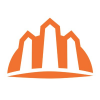
# The Quickest Introduction to Julia
#### (for Pythonistas)

Paweł Święcki

_This notebook is based on `Julia 0.6.1`._

_This notebook can be found here:_

### https://gist.github.com/pawelswiecki

## 1. What is Julia and why should I care?

Julia is:

* **Fast** (like C, C++, ...; unlike Python, Ruby, ...)

* **Easy to learn, quick to prototype with** (like Python, ...; unlike C, C++, Java, ...)

* **Free** (like basically every language; unlike Matlab, Mathematica)

It's designed to perform high performance numerical and scientific computing.

It's **fast** due to **JIT compiler** and **smart type system** that helps the compiler to optimize the code. Mind that the programmer needs to know how to use the type system to achieve high performance. Julia also has powerful **metaprogramming capabilities**. 

I won't talk about type system or metaprogramming.

What I will talk about:

* basic types

* syntax

* defining functions

* control flow

* arrays and indexing

* calling Python modules from Julia code

But first...

#### JIT compiler in action

In [ ]:
function add(x, y)
    return x + y
end

In [ ]:
@time add(10, 20)

In [ ]:
@time add(110, 120)

In [ ]:
@time add(30.0, 40.0)

In [ ]:
@time add(130.0, 140.0)

## 2. Basic types

### 2.1. Numeric types

In [ ]:
i = 10

In [ ]:
typeof(i)

In [ ]:
f = 10.1

In [ ]:
typeof(f)

In [ ]:
r = 1//2

`//`? What is `r`?

In [ ]:
r + 2

In [ ]:
typeof(r)

In [ ]:
println(numerator(1//2))
println(denominator(1//2))

In [ ]:
1//2 / 7//8

In [ ]:
(1//2 + 1//4) * 2//5

We can use rational numbers with denominator of zero (`0`).

In [ ]:
1//0

In [ ]:
1//0 + 10

**In Python** there is no special syntax for rational numbers:

```python
# Python code
In [1]: from fractions import Fraction

In [2]: r = Fraction(1, 2)  # or Fraction('1/2')

In [3]: r + 2
Out[3]: Fraction(5, 2)

In [4]: r.numerator, r.denominator
Out[4]: (1, 2)

In [5]: (Fraction('1/2') + Fraction('1/4')) * Fraction('2/5')
Out[5]: Fraction(3, 10)
    
In [6]: Fraction(1, 0)
ZeroDivisionError: Fraction(1, 0)
    
In [7]: # ¯\_(ツ)_/¯
```

### 2.2. Strings and Chars

In [ ]:
# We use double quote `"` for Strings.
s = "Hello there!"

In [ ]:
typeof(s)

In [ ]:
# We use single quote `'` for Chars.
c = 'q'

In [ ]:
typeof(c)

Indexing strings returns chars.

In [ ]:
s[4]

In [ ]:
typeof(s[1])

So in Julia a single element of a String is a Char.

Unlike **in Python**, where it's another string:

```python
# Python code:
In [1]: s = "Hello there!"

In [2]: s[0]
Out[2]: 'H'

In [3]: s[0][0]
Out[3]: 'H'

In [4]: s[0][0][0]
Out[4]: 'H'
    
In [5]: s[0][0][0][0]
Out[5]: 'H'
```

## 3. Syntax

### 3.1. Indexing

Julia uses **1-based indexing**.

This is one of the biggest syntactic differences between Julia and Python (or, as a matter of fact, between Julia and most of the modern programming languages).

Matlab, Mathematica, Fortran use 1-based indexing as well.

In [ ]:
s2 = "ABCDEFG"

In [ ]:
s2[0]

In [ ]:
s2[1]

#### Accessing the last element

In [ ]:
s2[end]

In [ ]:
s2[end-1]

#### Slicing

In [ ]:
s2[1:3]

In [ ]:
s2[2:end-1]

Slicing with _step_ using `start:step:stop` syntax.

In [ ]:
s2[1:2:end]

### 3.2. Functions

#### 3.2.1. Defining functions

_Standard notation_

In [ ]:
function add1(x, y)
    return x + y
end

In [ ]:
add1(1, 2)

Unlike in Python: 
* `return` keyword is optional, value of the last expression gets returned. We can use `return` to return immediately;

* indentation is optional (`end` keyword defines end of blocks).

So this is equivalent: `function add1(x, y) x + y end`

_Math-like notation_

In [ ]:
add2(x, y) = x + y

In [ ]:
add2(10, 20)

Just like in Python, functions are first-class objects in Julia.

We also can use **anonymous functions**.

In [ ]:
((x, y) -> x + y)

In [ ]:
((x, y) -> x + y)(100, 200)

We can assign an anonymous function to a name.

In [ ]:
add3 = (x, y) -> x + y

In [ ]:
add3(100, 200)

#### 3.2.2. Operators are functions

In [ ]:
# this is a syntactic sugar
1 + 2

# for this
+(1, 2)

Also, we can pass operators around, just like any other functions.

In [ ]:
silly_apply(fn, arg1, arg2) = fn(arg1, arg2)

silly_apply(+, 1, 2)

#### 3.2.3. Function naming convention

Julia has a pretty smart naming convention: if a function's name ends with a bang (`!`) we know it may mutate its argument(s).

In [ ]:
my_array = [1, 2, 3, 4, 5, 6, 7]

In [ ]:
reverse(my_array)

In [ ]:
my_array

In [ ]:
reverse!(my_array)

In [ ]:
my_array

### 3.3. Control flow

#### 3.3.1. Conditional syntax

In [ ]:
function how_big_it_is(x)
    if x < 2
        println("$x is little")
    elseif x < 7
        println("$x is pretty small.")
    elseif x < 20
        println("$x is medium.")
    elseif x < 100
        println("$x is big.")
    else
        println("$x is huge!")
    end
end

In [ ]:
how_big_it_is(1)

In [ ]:
how_big_it_is(99)

**`if-elseif-else-end` blocks are expressions** — they return a value. "This value is simply the return value of the last executed statement in the branch that was chosen" [[docs](https://docs.julialang.org/en/release-0.6/manual/control-flow/#man-conditional-evaluation-1)].

In [ ]:
function is_it_one(x)
    answer =
        if x == 1
            println("It equals one! 🎉")
            true
        else
            println("$x doesn't equal one... 😟")
            false
        end
    return answer
end

In [ ]:
is_it_one(25)

In [ ]:
is_it_one(1)

#### 3.3.2. For loops

In [ ]:
for n = [1, 2, 3]
    println(n)
end

In [ ]:
# `=` can be replaced with `in`
for c in ['a', 'b', 'c']
    println(c)
end

In [ ]:
for i in 1:6
    println(i)
end
# what is this `1:6`?

_Range objects_

In [ ]:
# a range object
range1 = 1:15

In [ ]:
typeof(range1)

In [ ]:
10 in range1

In [ ]:
# accessing range elements by index
range1[10]

In [ ]:
# range with step: `start:step:stop`
for i in -10:3:11
    println(i)
end

## 4. Arrays

### 4.1. Basics

Array is the basic and very powerful Julia's collection type.

Julia's Array syntax is inspired by Matlab.

In [ ]:
array1 = [1, 2, 3, 4]

In [ ]:
typeof(array1)

That means `array1` is a 1-dimentional array made of `Int64` elements.

**`size`** function returns a Tuple of array's dimensions: 

In [ ]:
size(array1)

In [ ]:
array2 = [1 2 3]

`array2` is a 2-dimensional Array...

In [ ]:
size(array2)

... of the size 1x3, which means it has 1 row and 3 columns.

Let's create a 3x4 **2D Array**.

In [ ]:
array3 = [
    1  2  3  4;
    5  6  7  8;
    9 10 11 12;
]

In [ ]:
size(array3)

Mind that Julia's 2D Array is **not** an "array of arrays" (which is, by the way, also possible to create in Julia but it's, most of the times, is not what we want). Number of dimensions is a parameter of every particular Array's type.

Let's create a **3D Array**!

In [ ]:
array4 = zeros(3, 3, 3)

(**`zeros(s)`** function creates an Array filled with zeroes, in the shape of `s`)

So `array4` is a 3D Array, 3x3x3, filled with zeroes.

4D Array?

In [ ]:
array5 = ones(2, 2, 2, 2)

(**`ones(s)`** function creates an Array filled with ones, in the shape of `s`)

### 4.2. Linear indexing of Arrays and iterating over them

We can index Arrays linearly:

In [ ]:
array3

In [ ]:
array3[1]

In [ ]:
array3[2]

In [ ]:
array3[3]

In [ ]:
array3[end]

In consequence, when we iterate over a 2D (or more-D) Array we just get its elements one at a time — no need to create nested loops (remember: 2D Array is not "array of arrays"!).

In [ ]:
for element in array3
    println(element)
end

### 4.3. Cartesian indexing 

But we can also use Cartesian indexing, which is indexing with Cartesian coordinates.

This way we can access an element in a specific row and column with `[row, column]` syntax for a 2D Array, or more generally `[axis-1, axis-2, ..., axis-n]` for an n-dimensional Array. 

In [ ]:
array3

In [ ]:
array3[1, 2]

To get the whole dimension of the Array use `:`.

In [ ]:
array3[1, :]

In [ ]:
array3[:, 2]

In [ ]:
array6 = reshape(collect(1:27), 3, 3, 3)

**`reshape(A, dims...)`** returns an Array containing the same data as A, but with different dimensions.

**`collect(collection)`** returns an Array of all items in a collection or iterator.

In [ ]:
array6[1, 3, 2]

In [ ]:
array6[:, 1, 2]

In [ ]:
array6[:, :, 2]

In [ ]:
array6[1, :, :]

In [ ]:
array6[1, :, 2]

### 4.4. Slicing Arrays

We can also select parts of Arrays using _range_.

In [ ]:
array7 = reshape(collect(1:16), 4, 4)

In [ ]:
array7[1:2, 1:2]

In [ ]:
array7[2:3, 1:3]

### 4.5. Mutating Arrays

##### Using linear indexing

In [ ]:
array6

In [ ]:
array6[4] = 9999

In [ ]:
array6

##### Using Cartesian indexing

_Single elements_

In [ ]:
array6

In [ ]:
array6[1,2,3] = 1111111

In [ ]:
array6

_Using slicing_

In [ ]:
array7[1:2, 1:2] = [99 98; 97 96]

In [ ]:
array7

### 4.6. Array Comprehensions

In [ ]:
[n for n in 1:5]

In [ ]:
[x+y for x in 1:5, y in 1:3]

In [ ]:
[(x,y,z)
    for x = "🔴🔵⚪",
        y = "🙈🙊🙉",
        z = "🙂😬😡😂😶"]

## 5. Calling Python code

Suppose we want to use Python's *requests* library in Julia. 

In Python using the library would look like this:

```python
# Python code
In [1]: import requests

In [2]: response = requests.get("http://httpbin.org/get")

In [3]: response.status_code
Out[3]: 200

In [4]: response.headers
Out[4]: {'Connection': 'keep-alive', 'Server': 'meinheld/0.6.1', 'Date': 'Sat, 18 Nov 2017 19:51:47 GMT', 'Content-Type': 'application/json', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true', 'X-Powered-By': 'Flask', 'X-Processed-Time': '0.000778198242188', 'Content-Length': '265', 'Via': '1.1 vegur'}
```

In Julia we can use **PyCall library**!

In [ ]:
# Pkg.add("PyCall")
using PyCall
@pyimport requests  # given we have requests installed! 

In [ ]:
response = requests.get("http://httpbin.org/get")

In [ ]:
response.status_code

But...

In [ ]:
response[:status_code]

In [ ]:
response[:headers]

We can even...

In [ ]:
response[:__dict__]

## BONUS: Special characters in code
We can easily use LaTeX syntax to get special symbols, like:

`\phi` - ϕ

`\Sigma` - Σ

`\Delta` - Δ

`\pi` - π

`\equiv` - ≡

Just type `\name` and press `Tab`.

We can use these symbols as names:

In [ ]:
Σ = 1 + 2 + 3 + 4;
Δ = 100 - 101;

In [ ]:
Σ

In [ ]:
Δ

#### Stay tuned for a talk(s) about Julia's type system and multiple dispatch!